(Text(0.5,1,'Threshold of 200'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

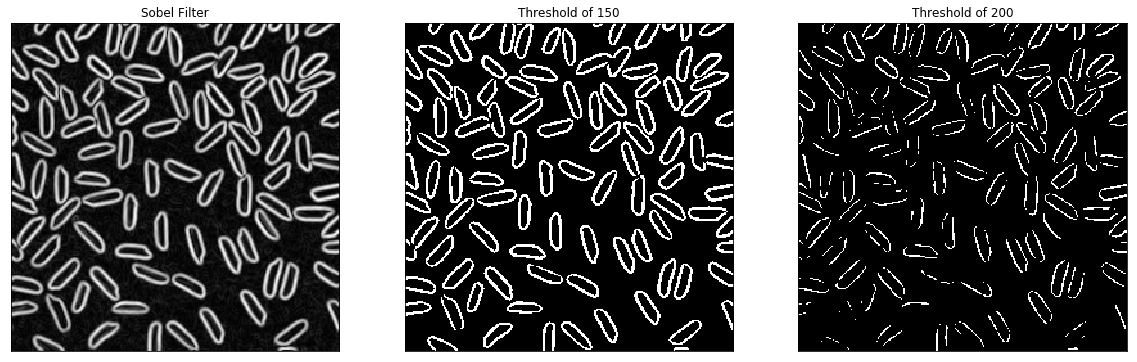

In [2]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

#2.1- Sobel Edge Detector with two thresholds
# load image as grayscale 

img = cv2.imread("rice.png", cv2.IMREAD_GRAYSCALE)

# Sobel filter, kernel size of 3 
Horizontal = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
Vertical = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# compute sobel Magnitude
SobelMag = cv2.magnitude(Horizontal,Vertical)

#Edge Detector- Thresholding
ret,thresh = cv2.threshold(SobelMag, 150 ,255, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(SobelMag, 200 ,255, cv2.THRESH_BINARY)

#plot
plt.figure(figsize=(20, 20))

plt.subplot(131), plt.imshow(SobelMag, cmap="gray")
plt.title("Sobel Filter"), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(thresh, cmap="gray")
plt.title("Threshold of 150"), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(thresh2, cmap="gray")
plt.title("Threshold of 200"), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Sobel Detector on Sharpened Image w Gaussian filter-200'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

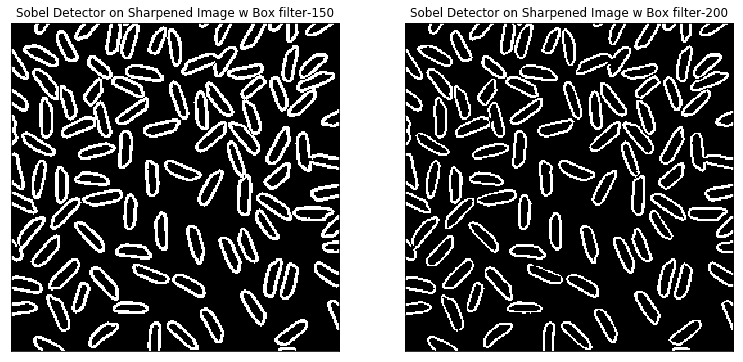

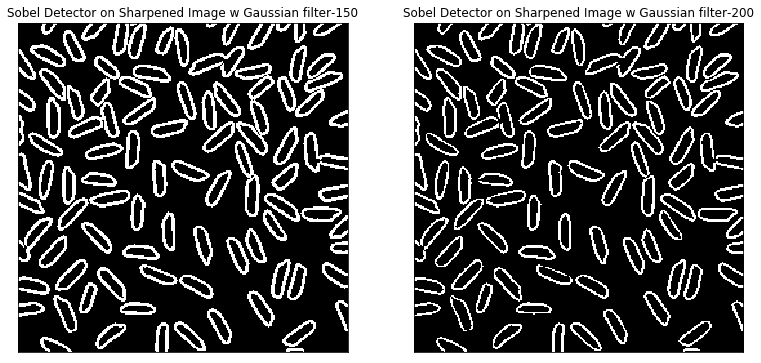

In [3]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

# sobel edge detector to two previously sharpened images 
# First will copy paste code from previous question to get sharpened images 
#Start Copy


image_path = "rice.png"
img = cv2.imread(image_path)


#5x5 kernel
kernel = np.ones((5,5), np.float32)/(5*5)
# filter the image, blurred using box filter
blurredimg = cv2.filter2D(img, -1, kernel)
# filter image using, Gaussian blurr
blurredimg2 = cv2.GaussianBlur(img, (5,5), 2)
#Sharpen using Box filter as blurred image
details = img - blurredimg       
sharpened = img + details   
#Sharpen using Gaussian Filter as blurred 
details2 = img - blurredimg2
sharpened2= img + details2         
# convert from BGR to RGB for displaying
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blurredimg = cv2.cvtColor(blurredimg, cv2.COLOR_BGR2RGB)
details = cv2.cvtColor(details,cv2.COLOR_BGR2RGB)
sharpened = cv2.cvtColor(sharpened,cv2.COLOR_BGR2RGB)
blurredimg2 =cv2.cvtColor(blurredimg2,cv2.COLOR_BGR2RGB)
details2 = cv2.cvtColor(details2,cv2.COLOR_BGR2RGB)
sharpened2 = cv2.cvtColor(sharpened2,cv2.COLOR_BGR2RGB)
#end of copied code 

# Sobel filter, kernel size of 3 on both sharpened images
Horizontal = cv2.Sobel(sharpened, cv2.CV_64F, 1, 0, ksize=3)
Vertical = cv2.Sobel(sharpened, cv2.CV_64F, 0, 1, ksize=3)

Horizontal2 = cv2.Sobel(sharpened2, cv2.CV_64F, 1, 0, ksize=3)
Vertical2 = cv2.Sobel(sharpened2, cv2.CV_64F, 0, 1, ksize=3)

#Sobel Magnitude 
SobelMag1 = cv2.magnitude(Horizontal,Vertical)
SobelMag2 = cv2.magnitude(Horizontal2,Vertical2)

#Edge Detector- Thresholding on both images 
ret,thresh = cv2.threshold(SobelMag1, 150 ,255, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(SobelMag1, 200 ,255, cv2.THRESH_BINARY)

ret,thresh3 = cv2.threshold(SobelMag2, 150 ,255, cv2.THRESH_BINARY)
ret,thresh4 = cv2.threshold(SobelMag2, 200 ,255, cv2.THRESH_BINARY)

#plot
plt.figure(figsize=(20, 20))

plt.subplot(131), plt.imshow(thresh/(np.amax(thresh)), cmap="gray")
plt.title("Sobel Detector on Sharpened Image w Box filter-150"), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(thresh2/(np.amax(thresh2)), cmap="gray")
plt.title("Sobel Detector on Sharpened Image w Box filter-200"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(13, 13))
plt.subplot(121), plt.imshow(thresh3/(np.amax(thresh3)), cmap="gray")
plt.title("Sobel Detector on Sharpened Image w Gaussian filter-150"), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(thresh4/(np.amax(thresh4)), cmap="gray")
plt.title("Sobel Detector on Sharpened Image w Gaussian filter-200"), plt.xticks([]), plt.yticks([])

2.1- Effect of sharpening on edge detection

As shown clearer with the images using a threshold of 200, applying a Sobel Filter on sharpened images results in a much more accurate edge detector, the outlines of the objects are thinner, therefore more precise. There is also less noise in the filtered sharpened image. 

max 795.0308170127747


(Text(0.5,1,'Sobel Detector Thresh 20%= 159'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

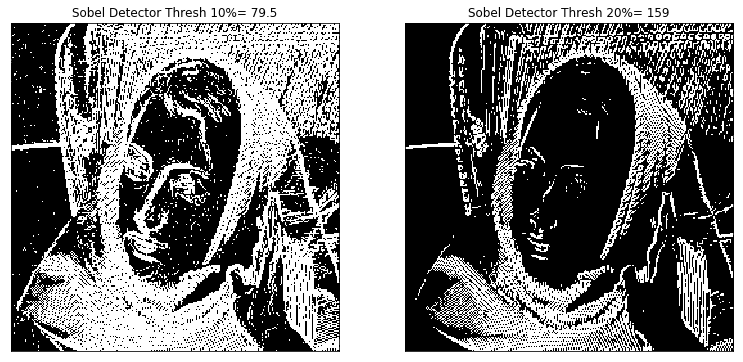

In [4]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
#2.22 Sobel Edge on 'Woman' using 10% and 20% of max filter response 

#load image in gray scale 
img = cv2.imread("woman.png", cv2.IMREAD_GRAYSCALE)

# Sobel filter, kernel size of 3 
Horizontal = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
Vertical = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# compute sobel Magnitude
SobelMag = cv2.magnitude(Horizontal,Vertical)

print("max", np.amax(SobelMag)) 

#Edge Detector- Thresholding
#Since max is 795, 10% and 20% of that value is 79.5 and 159
ret,thresh8 = cv2.threshold(SobelMag, np.amax(SobelMag) * 0.1 ,255, cv2.THRESH_BINARY)
ret,thresh9 = cv2.threshold(SobelMag, np.amax(SobelMag) * 0.2 ,255, cv2.THRESH_BINARY)

#plot
plt.figure(figsize=(20, 20))

plt.subplot(131), plt.imshow(thresh8, cmap="gray")
plt.title("Sobel Detector Thresh 10%= 79.5"), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(thresh9, cmap="gray")
plt.title("Sobel Detector Thresh 20%= 159"), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'Sobel Edge on Denoised, Thresh 20%= 159'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

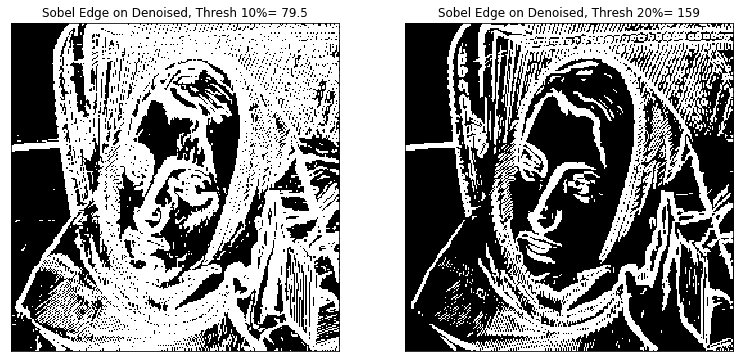

In [5]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import compare_psnr

#2.22 Denoise image with 3x3 box fiter and apply sobel edge detector 

#load image grayscale
img_path = "woman.png"
img = cv2.imread(img_path)

#3x3 kernel
kernel = np.ones((3,3), np.float32)/(3*3)
# filter the image, blurred using box filter
denoisedimage = cv2.filter2D(img, -1, kernel)

#grayscale
denoisedimage= cv2.cvtColor(denoisedimage, cv2.COLOR_BGR2GRAY)

# Sobel filter, kernel size of 3 
Horizontal = cv2.Sobel(denoisedimage, cv2.CV_64F, 1, 0, ksize=3)
Vertical = cv2.Sobel(denoisedimage, cv2.CV_64F, 0, 1, ksize=3)

# compute sobel Magnitude
SobelMag20 = cv2.magnitude(Horizontal,Vertical)

#Edge Detector- Thresholding
ret,thresh30 = cv2.threshold(SobelMag20, np.amax(SobelMag20) * 0.1 ,255, cv2.THRESH_BINARY)
ret,thresh40 = cv2.threshold(SobelMag20, np.amax(SobelMag20) * 0.2 ,255, cv2.THRESH_BINARY)

#plot
plt.figure(figsize=(20, 20))

plt.subplot(131), plt.imshow(thresh30, cmap="gray")
plt.title("Sobel Edge on Denoised, Thresh 10%= 79.5"), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(thresh40, cmap="gray")
plt.title("Sobel Edge on Denoised, Thresh 20%= 159"), plt.xticks([]), plt.yticks([])



2.22- Effectiveness of denoising prior to edge detection 

As we can see, denoising an image with a box filter before applying the edge detection yeilds much better results, images with less noise and clearer edges.